# Data Vizualization


## Imports

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/"

## Reading data

In [6]:
file_name1 = dir_origen_csv + "Data_limpia_windows.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df.head()

,medidor,fecha,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,Longitud,CLASIFICACION,kwh_consumido,kvarh_consumido,tipo_consumo,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth
0,15029828,2019-03-18 10:53:26,1064018,113.3119,113.7589,112.6393,2.0239,1.1115,0.9293,A3,...,-79.4001,PILADORA,0.0000,0.0,medio,3,0,0,NaN,12
1,15029828,2019-03-18 12:53:28,1064367,113.9422,115.3172,113.7901,2.0303,1.3326,1.0646,A3,...,-79.4001,PILADORA,507.0450,0.0,medio,3,0,0,253.452097,12
2,15029828,2019-03-18 14:53:30,1064735,112.4796,113.6260,112.0572,2.0008,1.2326,1.0076,A3,...,-79.4001,PILADORA,530.7225,0.0,medio,3,0,0,265.287559,12
3,15029828,2019-03-18 16:53:29,1065045,115.6603,117.0650,115.9671,2.5937,0.4386,1.2305,A3,...,-79.4001,PILADORA,438.5850,0.0,medio,3,0,0,219.322962,12
4,15029828,2019-03-18 17:34:42,1065148,116.2225,117.8265,115.9384,2.6294,0.4347,1.2346,A3,...,-79.4001,PILADORA,8.0325,0.0,medio,3,0,0,11.693085,12


## Univarible 

### Entropy

In [39]:
def entropy1(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    return entropy(counts, base=base)

In [42]:
entropy_df = df.apply(entropy1)

[Text(0, 0, 'medidor'),
 Text(0, 0, 'fecha'),
 Text(0, 0, 'lectura_id_orig'),
 Text(0, 0, 'voltajeA'),
 Text(0, 0, 'voltajeB'),
 Text(0, 0, 'voltajeC'),
 Text(0, 0, 'corrienteA'),
 Text(0, 0, 'corrienteB'),
 Text(0, 0, 'corrienteC'),
 Text(0, 0, 'modelo'),
 Text(0, 0, 'angvoltajeA'),
 Text(0, 0, 'angvoltajeB'),
 Text(0, 0, 'angvoltajeC'),
 Text(0, 0, 'angcorrienteA'),
 Text(0, 0, 'angcorrienteB'),
 Text(0, 0, 'angcorrienteC'),
 Text(0, 0, 'powerfactorsystem'),
 Text(0, 0, 'totalkwh'),
 Text(0, 0, 'totalkvarh'),
 Text(0, 0, 'Maxkw'),
 Text(0, 0, 'Maxkvar'),
 Text(0, 0, 'fechamaxkw'),
 Text(0, 0, 'fechamaxkvar'),
 Text(0, 0, 'frecuencia'),
 Text(0, 0, 'Latitud'),
 Text(0, 0, 'Longitud'),
 Text(0, 0, 'CLASIFICACION'),
 Text(0, 0, 'kwh_consumido'),
 Text(0, 0, 'kvarh_consumido'),
 Text(0, 0, 'tipo_consumo'),
 Text(0, 0, 'clasificacion_encoded'),
 Text(0, 0, 'modelo_encoded'),
 Text(0, 0, 'tipo_consumo_encoded'),
 Text(0, 0, 'kwh_hora'),
 Text(0, 0, 'dayMonth')]

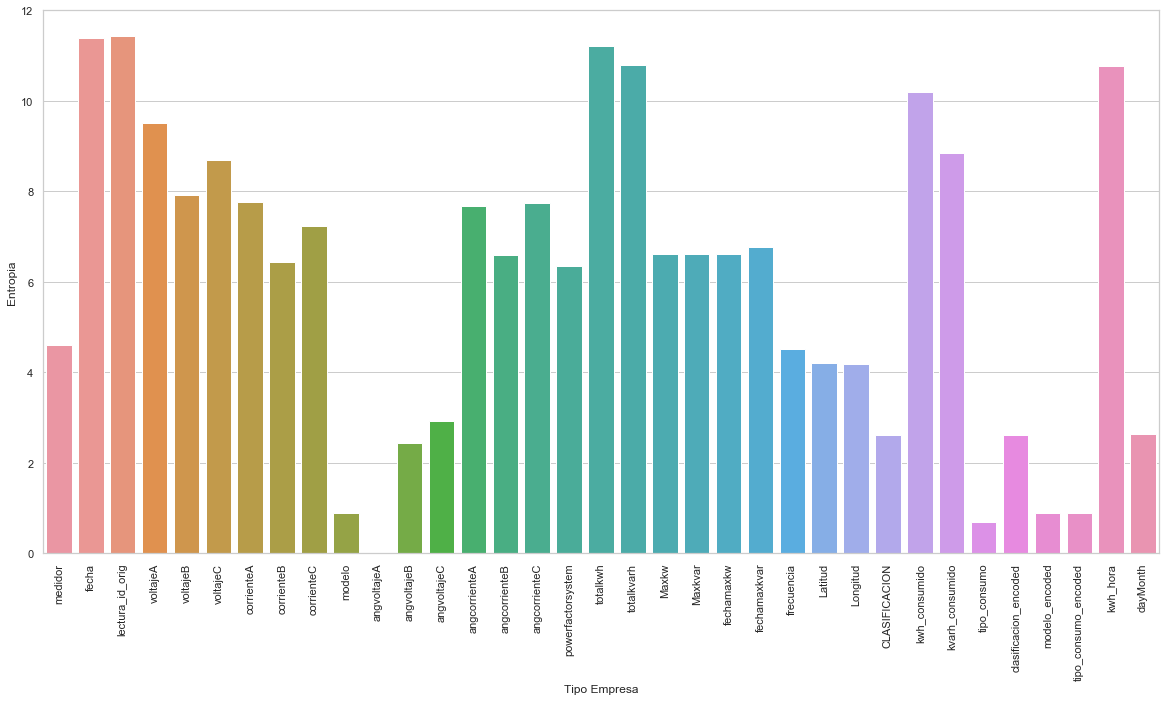

In [44]:
plt.figure(figsize = (20,10))
pp = entropy_df.reset_index()
pp.columns = ["Tipo Empresa", "Entropia"]
ax = sns.barplot(x="Tipo Empresa", y="Entropia", data= pp)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


### Counting

In [8]:
num_clas = {}
num_fase = {}
num_modelo = {}
num_modelo_empresa = {}
consumo_tipoEmpresa = {}
for n, g in df.groupby(["medidor", "CLASIFICACION"]):
    modelo, tipo = n
    
    #tipo de empresa
    try:
        num_clas[tipo] += 1
    except:
        num_clas[tipo] = 1
        
    #Numero de fases
    if(g.voltajeB.sum() == 0 and g.voltajeC.sum() == 0):
        tipo_fase = "Monofasico"
    elif(g.voltajeB.sum() == 0 and g.voltajeC.sum() != 0):
        tipo_fase = "Bifasico"
    else:
        tipo_fase = "Trifasico"
    try:
        num_fase[tipo_fase] += 1
    except:
        num_fase[tipo_fase] = 1
        
    #Modelo    
    tipo_modelo = g.modelo.iloc[1]
    
    try:
        num_modelo[tipo_modelo] += 1
    except:
        num_modelo[tipo_modelo] = 1
 
    #Empresa y modelo   
    try:
        num_modelo_empresa[tipo + "-" + tipo_modelo ] += 1
    except:
        num_modelo_empresa[tipo + "-" + tipo_modelo ] = 1
    
    #Empresa y consumo
    try:
        consumo_tipoEmpresa[tipo] += g.kwh_consumido.mean()
    except:
        consumo_tipoEmpresa[tipo] = g.kwh_consumido.mean()
    

In [9]:
q = pd.DataFrame.from_dict(num_clas, orient='index', columns=["num"]).reset_index()
q.columns=["tipo_Empresa", "num"]
q    

,tipo_Empresa,num
0,PILADORA,7
1,IGLESIA,6
2,ESTACION DE BOMBEO,6
3,BANCO,1
4,PROCESAMIENTO DE FRUTAS,1
5,FARMACIA,3
6,VENTA DE AGROQUIMICOS,1
7,ENTIDAD PRIVADA,13
8,EXTRACCION DE ACEITE,1
9,SUBESTACION,30


In [10]:
w = pd.DataFrame.from_dict(num_fase, orient='index', columns=["num"]).reset_index()
w.columns=["Fase", "num"]
w    

,Fase,num
0,Trifasico,85
1,Monofasico,15
2,Bifasico,12


In [11]:
e = pd.DataFrame.from_dict(num_modelo, orient='index', columns=["num"]).reset_index()
e.columns=["modelo", "num"]
e    

,modelo,num
0,A3,52
1,KV2C,54
2,KV2c,6


In [12]:
t = pd.DataFrame.from_dict(consumo_tipoEmpresa, orient='index', columns=["kwh_consumido"]).reset_index()
t.columns=["tipo_Empresa", "kwh_consumido"]

t    

,tipo_Empresa,kwh_consumido
0,PILADORA,263.717197
1,IGLESIA,68.852662
2,ESTACION DE BOMBEO,468.775399
3,BANCO,19.754306
4,PROCESAMIENTO DE FRUTAS,0.745214
5,FARMACIA,102.470114
6,VENTA DE AGROQUIMICOS,5.356173
7,ENTIDAD PRIVADA,1471.635931
8,EXTRACCION DE ACEITE,299.689708
9,SUBESTACION,14.201810


In [13]:
r = pd.DataFrame.from_dict(num_modelo_empresa, orient='index', columns=["num"]).reset_index()
r.columns=["tipoEmpresa-modelo", "num"]
r["tipoEmpresa"] = r["tipoEmpresa-modelo"].str.split('-').str[0]
r["modelo"] = r["tipoEmpresa-modelo"].str.split('-').str[1]
r    

,tipoEmpresa-modelo,num,tipoEmpresa,modelo
0,PILADORA-A3,4,PILADORA,A3
1,IGLESIA-A3,1,IGLESIA,A3
2,ESTACION DE BOMBEO-A3,4,ESTACION DE BOMBEO,A3
3,BANCO-A3,1,BANCO,A3
4,PROCESAMIENTO DE FRUTAS-A3,1,PROCESAMIENTO DE FRUTAS,A3
5,FARMACIA-A3,1,FARMACIA,A3
6,VENTA DE AGROQUIMICOS-A3,1,VENTA DE AGROQUIMICOS,A3
7,ENTIDAD PRIVADA-A3,1,ENTIDAD PRIVADA,A3
8,EXTRACCION DE ACEITE-A3,1,EXTRACCION DE ACEITE,A3
9,SUBESTACION-A3,30,SUBESTACION,A3


[Text(0, 0, 'PILADORA'),
 Text(0, 0, 'IGLESIA'),
 Text(0, 0, 'ESTACION DE BOMBEO'),
 Text(0, 0, 'BANCO'),
 Text(0, 0, 'PROCESAMIENTO DE FRUTAS'),
 Text(0, 0, 'FARMACIA'),
 Text(0, 0, 'VENTA DE AGROQUIMICOS'),
 Text(0, 0, 'ENTIDAD PRIVADA'),
 Text(0, 0, 'EXTRACCION DE ACEITE'),
 Text(0, 0, 'SUBESTACION'),
 Text(0, 0, 'COMERCIAL'),
 Text(0, 0, 'AVICOLA'),
 Text(0, 0, 'COMISARIATO'),
 Text(0, 0, 'VENTA DE ELECTRODOMESTICOS'),
 Text(0, 0, 'ENTIDAD PUBLICA'),
 Text(0, 0, 'SECADORA DE MAIZ'),
 Text(0, 0, 'CULTIVOS AGRICOLAS'),
 Text(0, 0, 'CENTRO DE SALUD'),
 Text(0, 0, 'PANADERIA'),
 Text(0, 0, 'INGENIO AZUCARERO'),
 Text(0, 0, 'ENVASADORA DE AGUA'),
 Text(0, 0, 'EMPACADORA DE BANANO'),
 Text(0, 0, 'HOTEL'),
 Text(0, 0, 'ENTIDAD CREDITICIA'),
 Text(0, 0, 'CONCESIONARIA'),
 Text(0, 0, 'HOSPITAL'),
 Text(0, 0, 'GASOLINERA'),
 Text(0, 0, 'FUMIGACION AEREA'),
 Text(0, 0, 'ENTIDAD MUNICIPAL'),
 Text(0, 0, 'SALON DE EVENTOS'),
 Text(0, 0, 'LUBRICADORA'),
 Text(0, 0, 'CLINICA')]

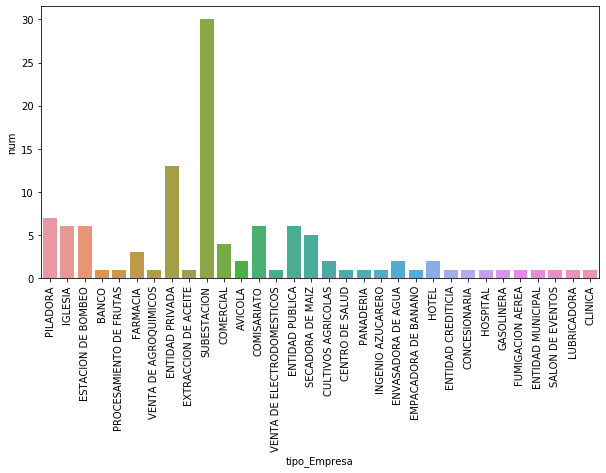

In [14]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = "tipo_Empresa", y = "num", data = q)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Trifasico'), Text(0, 0, 'Monofasico'), Text(0, 0, 'Bifasico')]

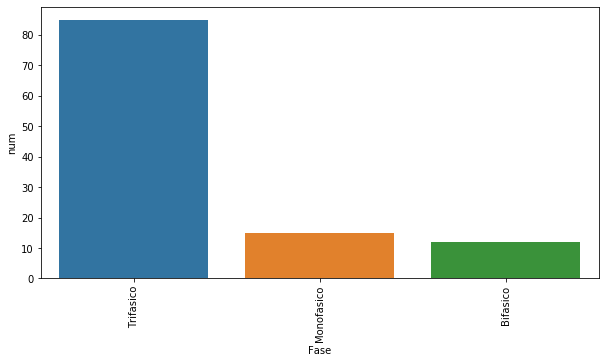

In [15]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = "Fase", y = "num", data = w)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'A3'), Text(0, 0, 'KV2C'), Text(0, 0, 'KV2c')]

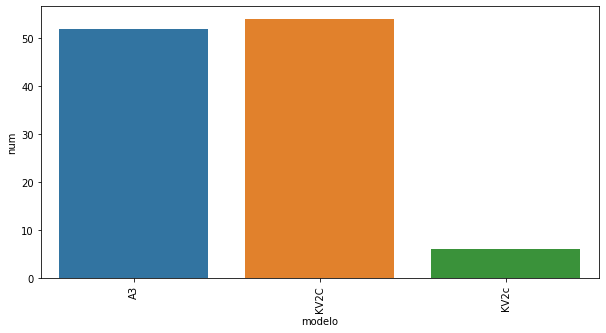

In [16]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = "modelo", y = "num", data = e)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'PILADORA'),
 Text(0, 0, 'IGLESIA'),
 Text(0, 0, 'ESTACION DE BOMBEO'),
 Text(0, 0, 'BANCO'),
 Text(0, 0, 'PROCESAMIENTO DE FRUTAS'),
 Text(0, 0, 'FARMACIA'),
 Text(0, 0, 'VENTA DE AGROQUIMICOS'),
 Text(0, 0, 'ENTIDAD PRIVADA'),
 Text(0, 0, 'EXTRACCION DE ACEITE'),
 Text(0, 0, 'SUBESTACION'),
 Text(0, 0, 'COMERCIAL'),
 Text(0, 0, 'AVICOLA'),
 Text(0, 0, 'COMISARIATO'),
 Text(0, 0, 'VENTA DE ELECTRODOMESTICOS'),
 Text(0, 0, 'ENTIDAD PUBLICA'),
 Text(0, 0, 'SECADORA DE MAIZ'),
 Text(0, 0, 'CULTIVOS AGRICOLAS'),
 Text(0, 0, 'CENTRO DE SALUD'),
 Text(0, 0, 'PANADERIA'),
 Text(0, 0, 'INGENIO AZUCARERO'),
 Text(0, 0, 'ENVASADORA DE AGUA'),
 Text(0, 0, 'EMPACADORA DE BANANO'),
 Text(0, 0, 'HOTEL'),
 Text(0, 0, 'ENTIDAD CREDITICIA'),
 Text(0, 0, 'CONCESIONARIA'),
 Text(0, 0, 'HOSPITAL'),
 Text(0, 0, 'GASOLINERA'),
 Text(0, 0, 'FUMIGACION AEREA'),
 Text(0, 0, 'ENTIDAD MUNICIPAL'),
 Text(0, 0, 'SALON DE EVENTOS'),
 Text(0, 0, 'LUBRICADORA'),
 Text(0, 0, 'CLINICA')]

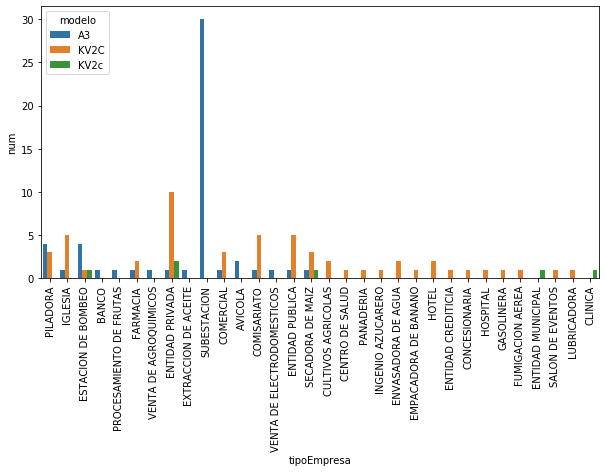

In [17]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = "tipoEmpresa", y = "num",hue="modelo", data = r)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'PILADORA'),
 Text(0, 0, 'IGLESIA'),
 Text(0, 0, 'ESTACION DE BOMBEO'),
 Text(0, 0, 'BANCO'),
 Text(0, 0, 'PROCESAMIENTO DE FRUTAS'),
 Text(0, 0, 'FARMACIA'),
 Text(0, 0, 'VENTA DE AGROQUIMICOS'),
 Text(0, 0, 'ENTIDAD PRIVADA'),
 Text(0, 0, 'EXTRACCION DE ACEITE'),
 Text(0, 0, 'SUBESTACION'),
 Text(0, 0, 'COMERCIAL'),
 Text(0, 0, 'AVICOLA'),
 Text(0, 0, 'COMISARIATO'),
 Text(0, 0, 'VENTA DE ELECTRODOMESTICOS'),
 Text(0, 0, 'ENTIDAD PUBLICA'),
 Text(0, 0, 'SECADORA DE MAIZ'),
 Text(0, 0, 'CULTIVOS AGRICOLAS'),
 Text(0, 0, 'CENTRO DE SALUD'),
 Text(0, 0, 'PANADERIA'),
 Text(0, 0, 'INGENIO AZUCARERO'),
 Text(0, 0, 'ENVASADORA DE AGUA'),
 Text(0, 0, 'EMPACADORA DE BANANO'),
 Text(0, 0, 'HOTEL'),
 Text(0, 0, 'ENTIDAD CREDITICIA'),
 Text(0, 0, 'CONCESIONARIA'),
 Text(0, 0, 'HOSPITAL'),
 Text(0, 0, 'GASOLINERA'),
 Text(0, 0, 'FUMIGACION AEREA'),
 Text(0, 0, 'ENTIDAD MUNICIPAL'),
 Text(0, 0, 'SALON DE EVENTOS'),
 Text(0, 0, 'LUBRICADORA'),
 Text(0, 0, 'CLINICA')]

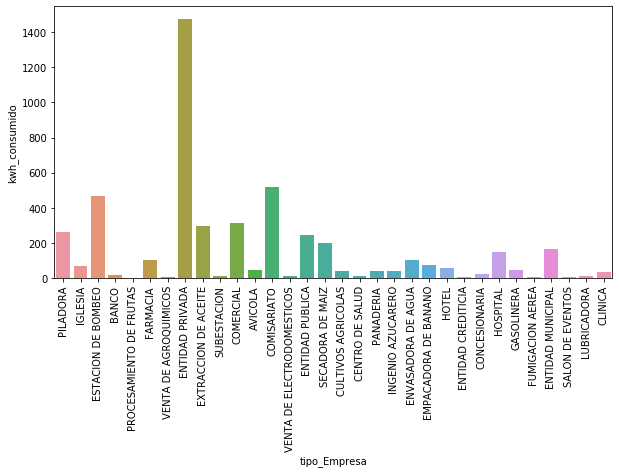

In [18]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = "tipo_Empresa", y = "kwh_consumido", data =t)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

### Multivarible

,tipo_consumo,modelo,TipoEmpresa,kwh_consumido,FactorDePotencia
tipo_consumo,1.000000,1.000000,0.455014,0.401053,0.086870
modelo,1.000000,1.000000,0.455014,0.401053,0.086870
TipoEmpresa,0.455014,0.455014,1.000000,0.527709,0.010506
kwh_consumido,0.401053,0.401053,0.527709,1.000000,0.170844
FactorDePotencia,0.086870,0.086870,0.010506,0.170844,1.000000


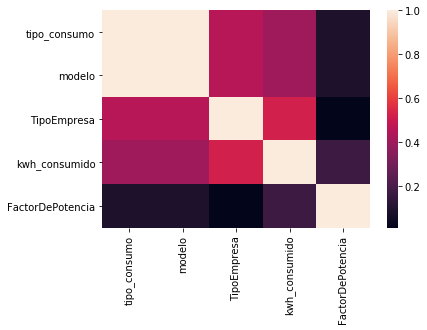

In [20]:
df_corr = df[["tipo_consumo_encoded", "modelo_encoded","clasificacion_encoded","kwh_consumido","powerfactorsystem"]]
labels = ["tipo_consumo", "modelo","TipoEmpresa","kwh_consumido","FactorDePotencia"]
df_corr.columns = labels
matcorr = df_corr.corr("spearman")
sns.heatmap(matcorr, xticklabels = labels, yticklabels = labels)
matcorr

## Temporal 

### Type of bussiness 

In [30]:
df["fecha"] = pd.to_datetime(df["fecha"])

In [23]:
df_g = df.groupby(["CLASIFICACION", "medidor"])

<Figure size 720x720 with 0 Axes>

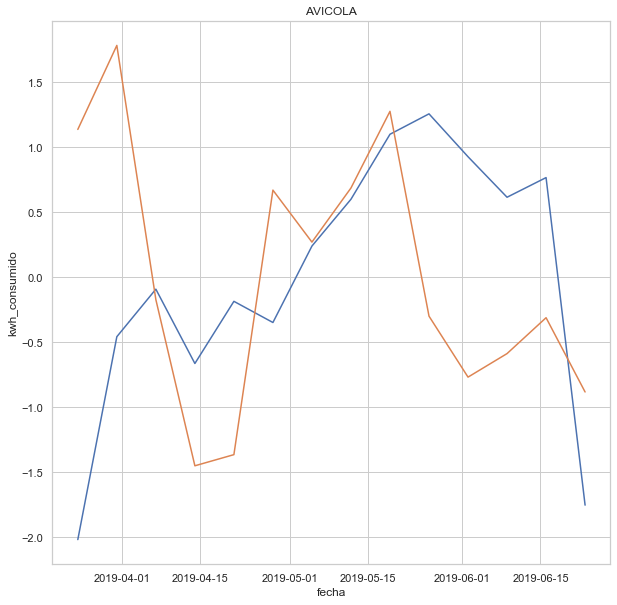

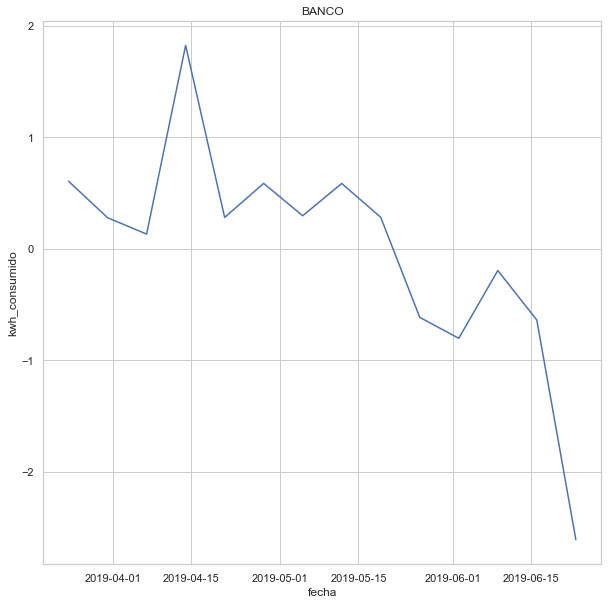

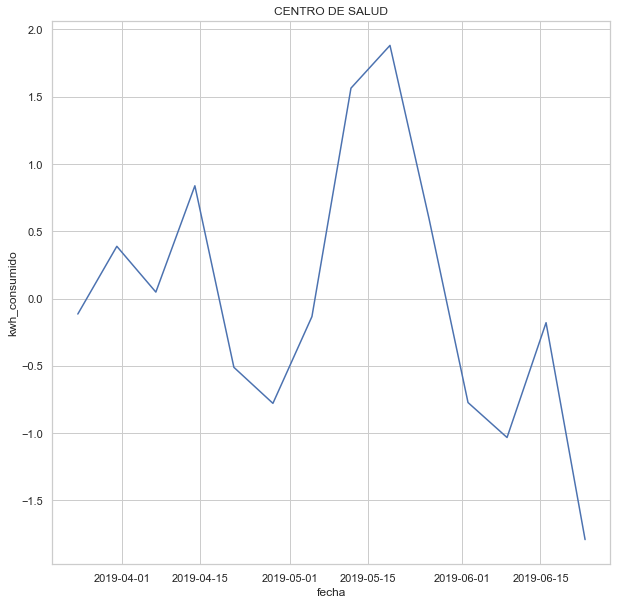

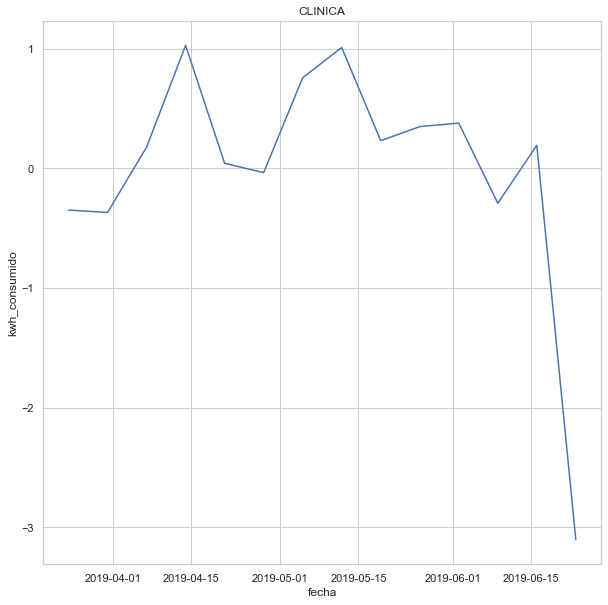

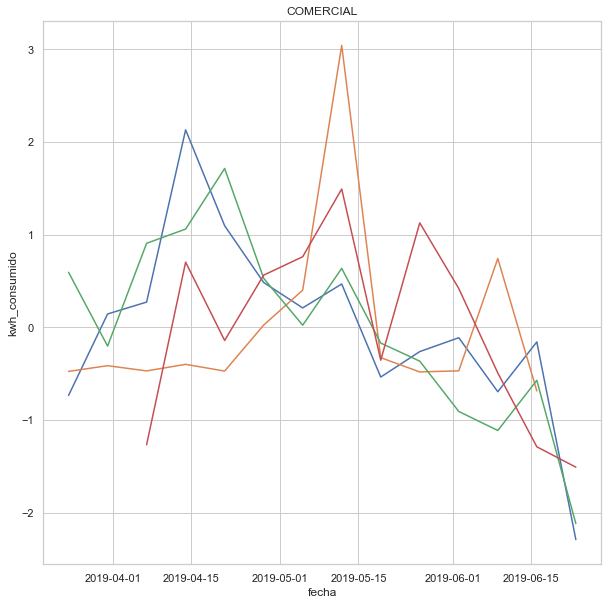

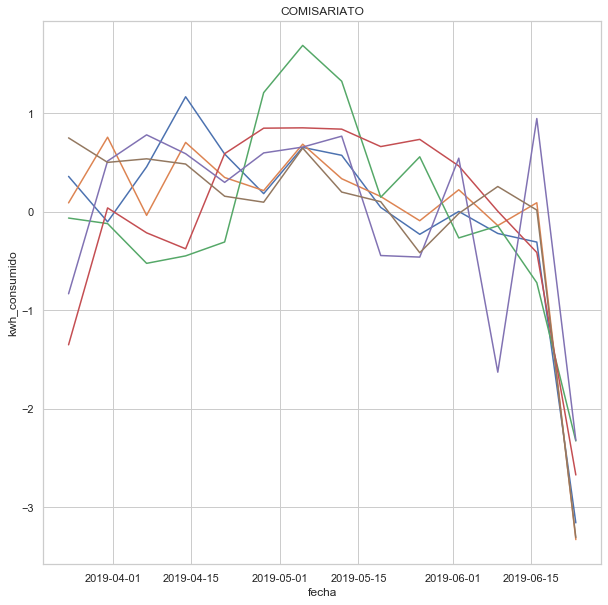

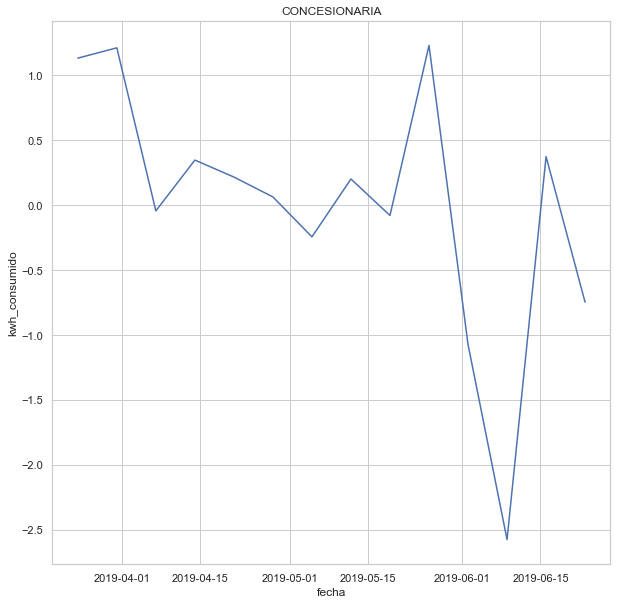

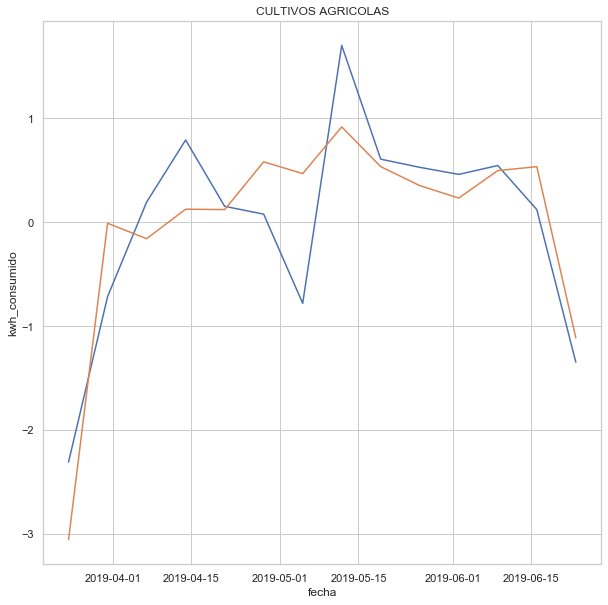

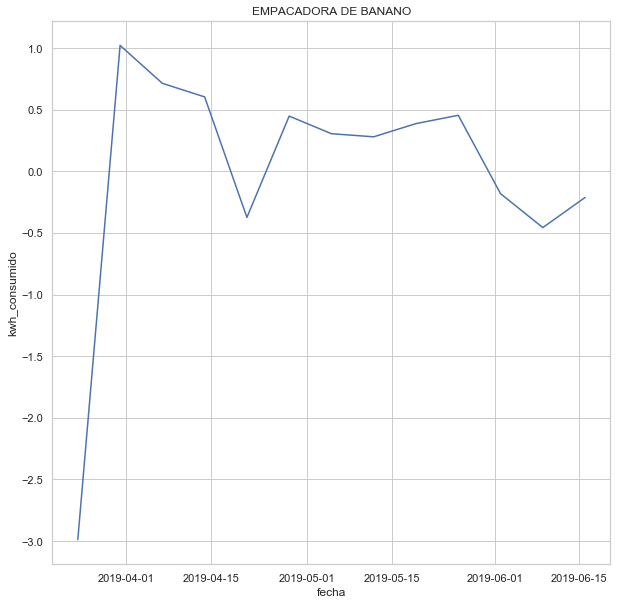

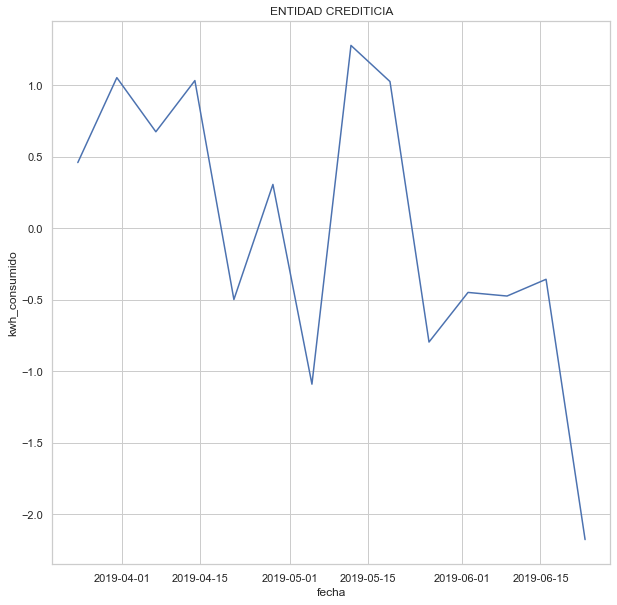

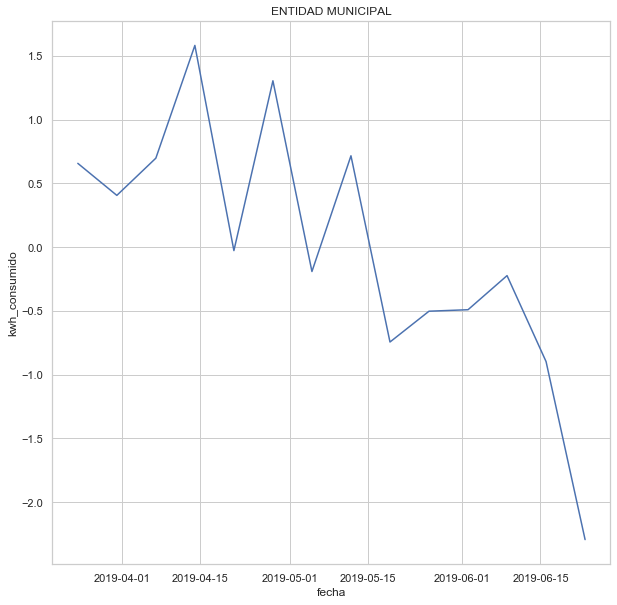

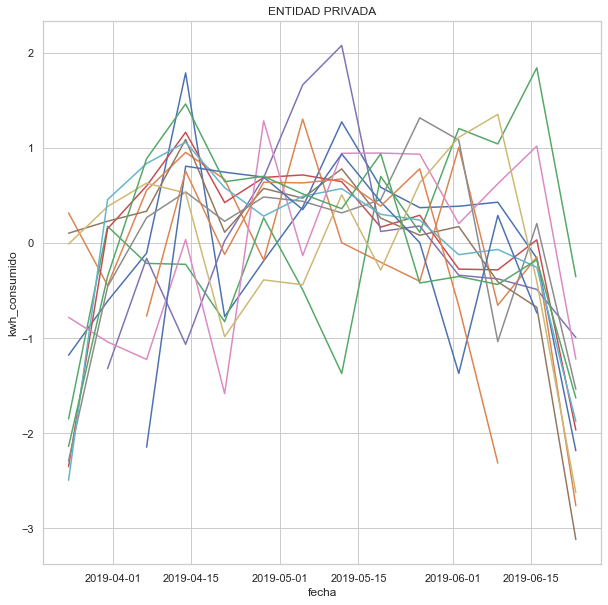

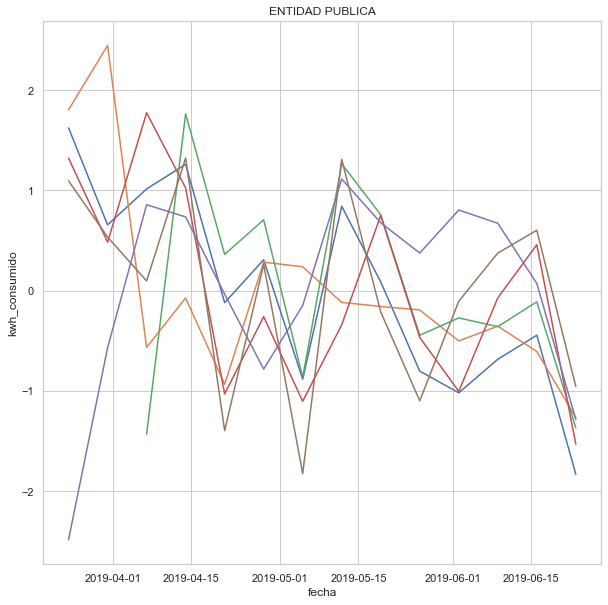

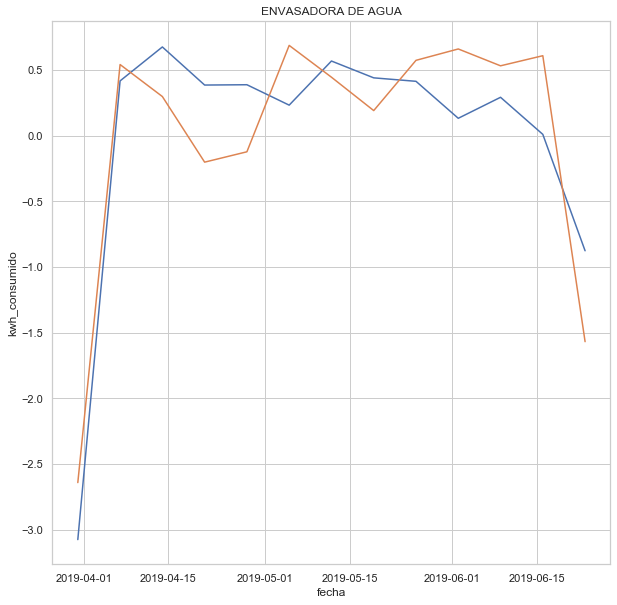

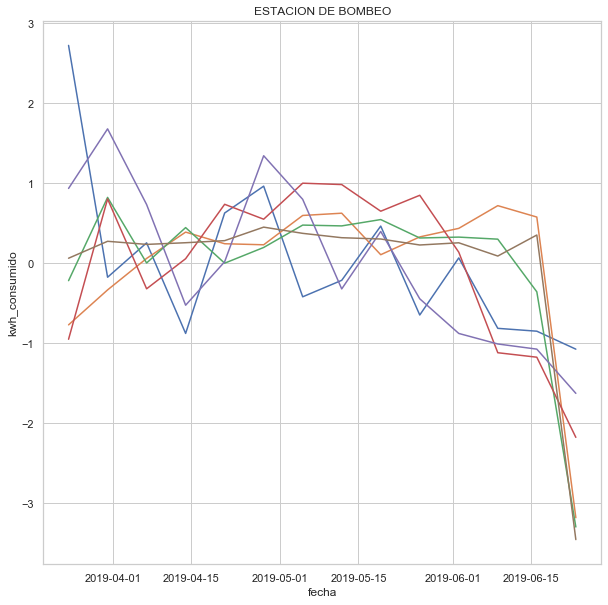

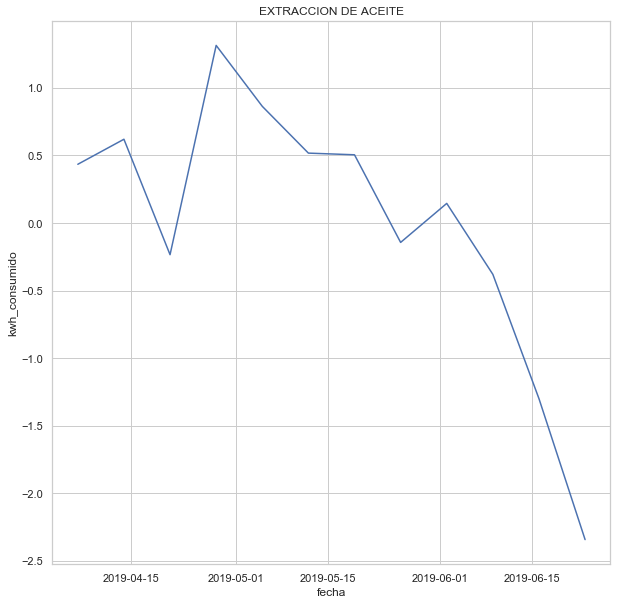

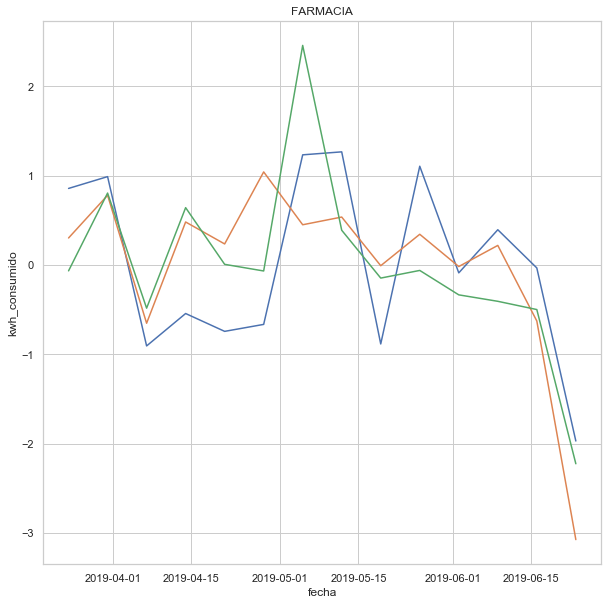

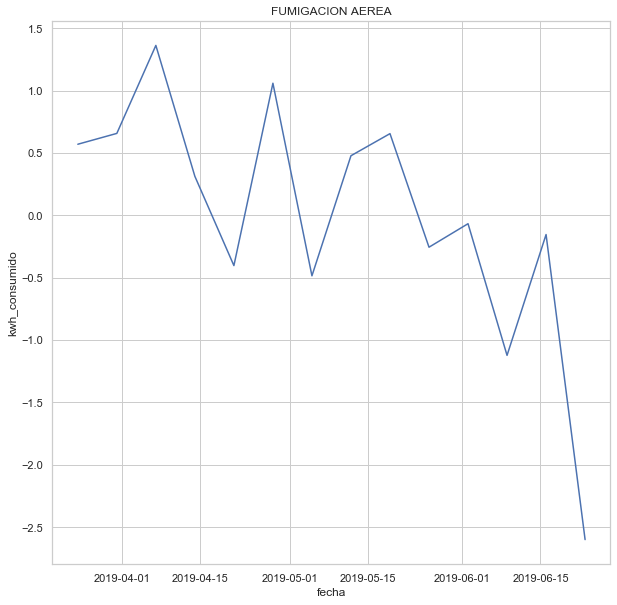

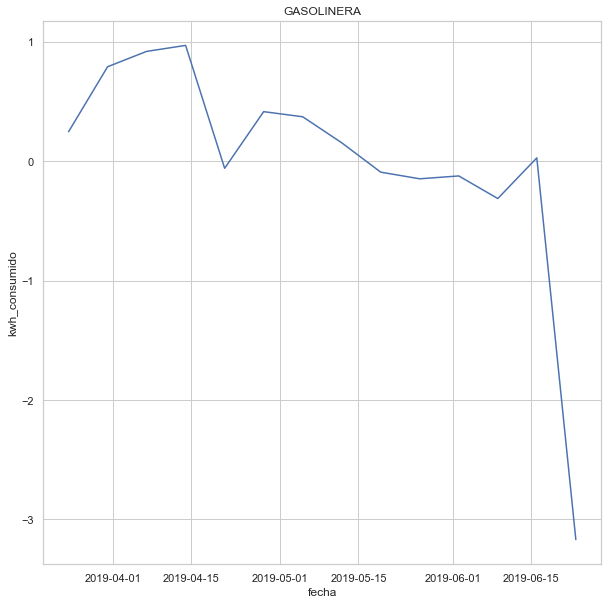

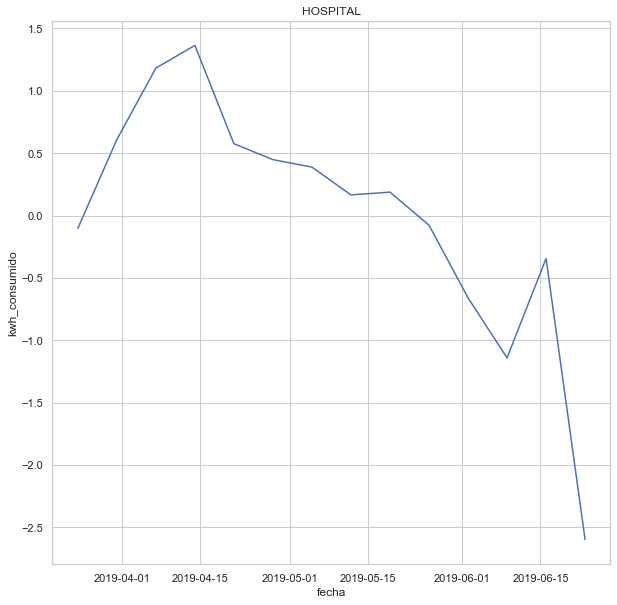

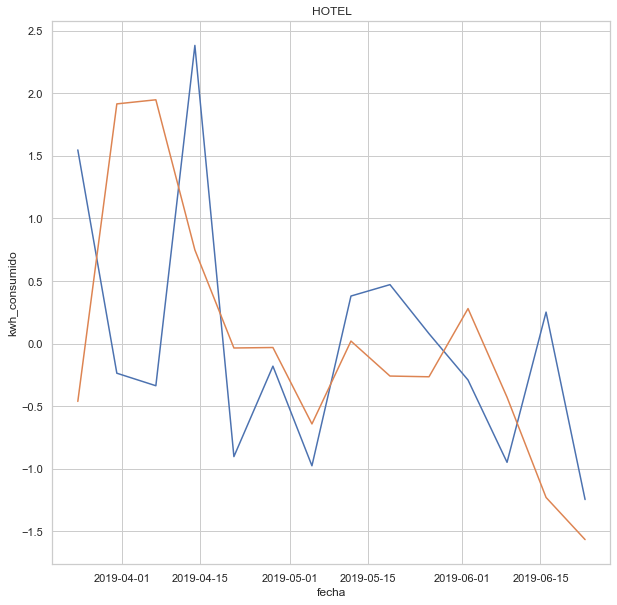

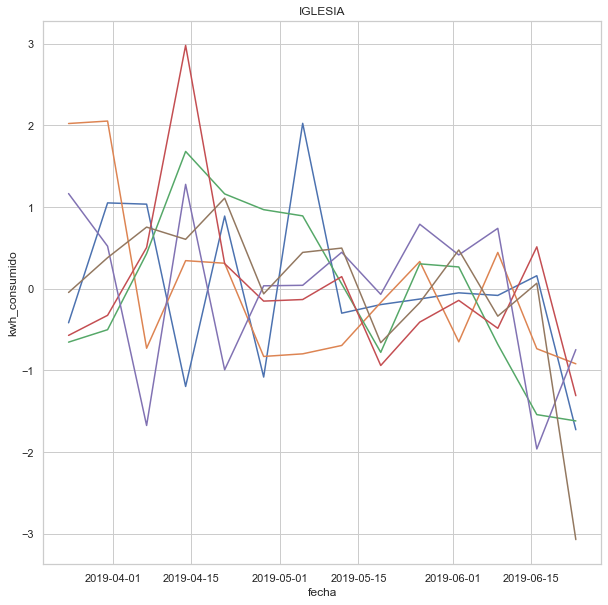

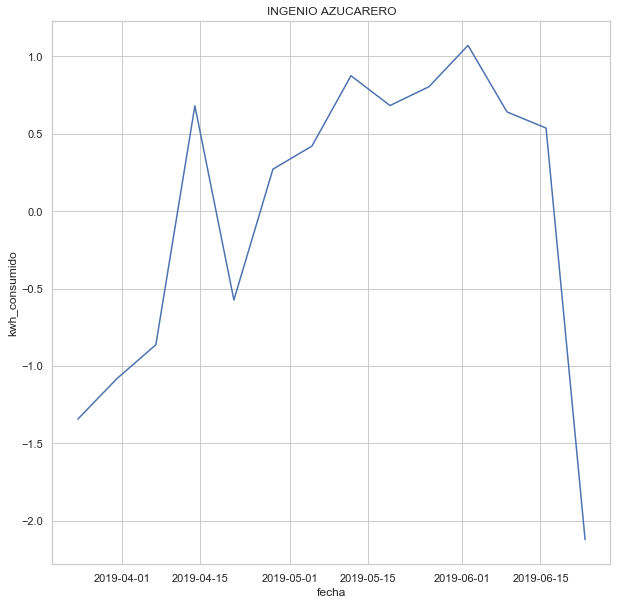

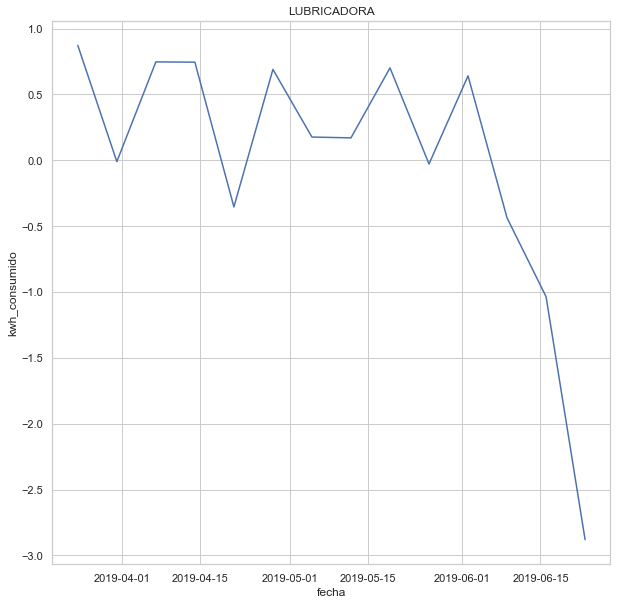

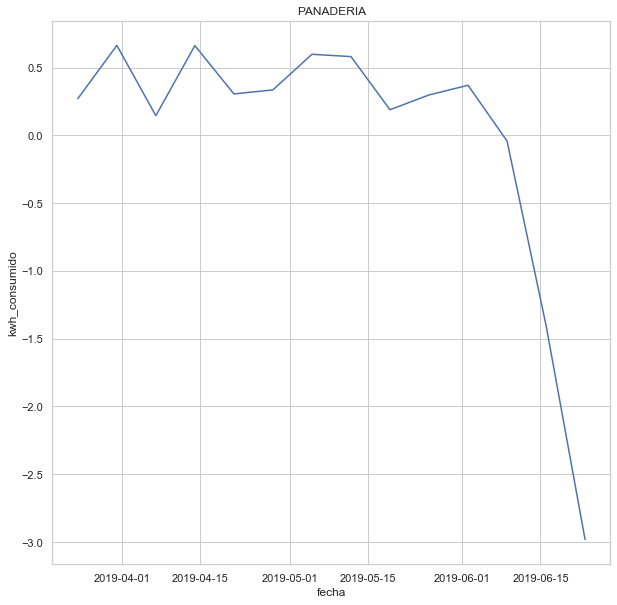

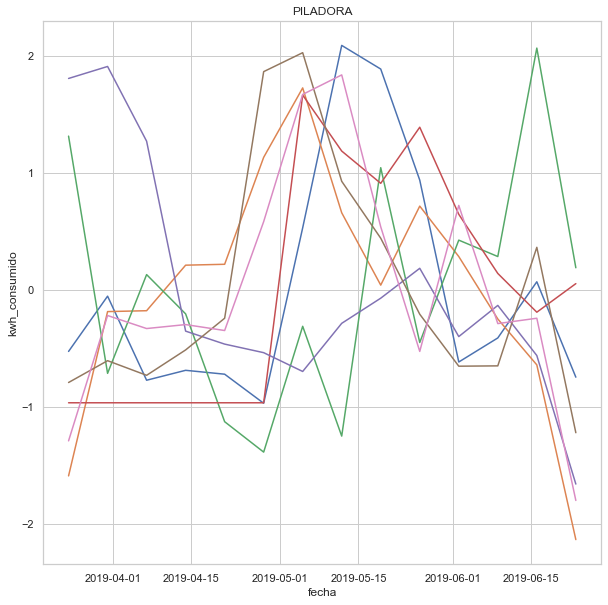

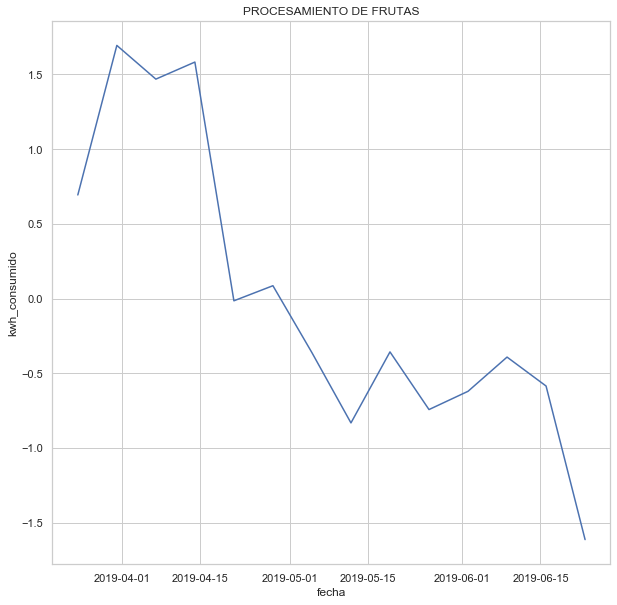

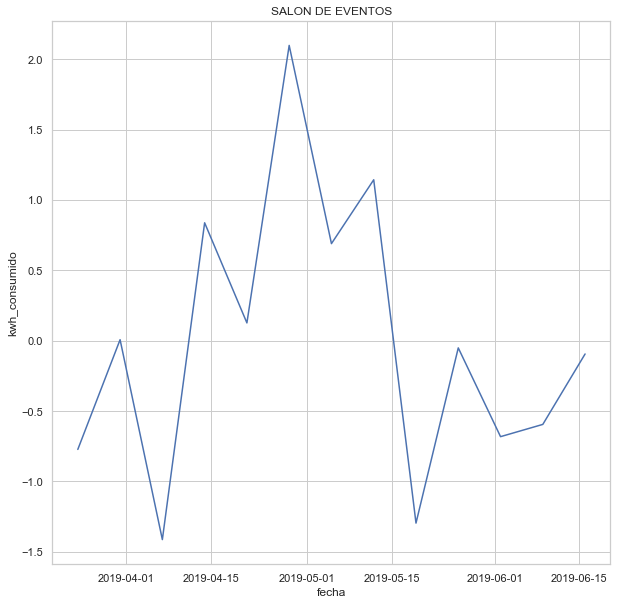

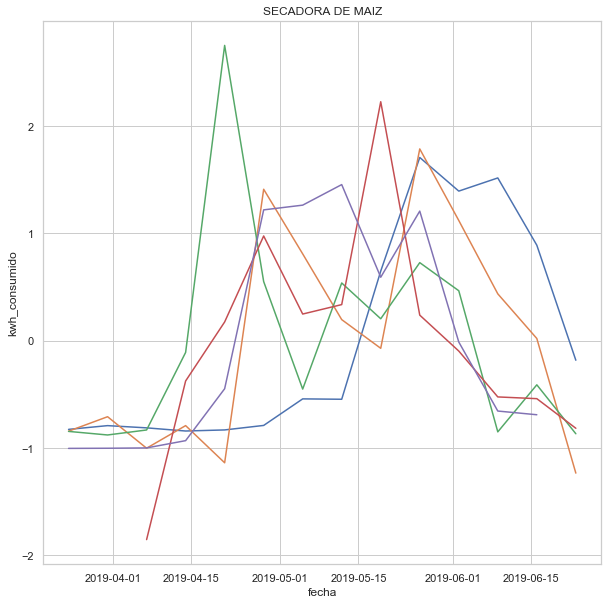

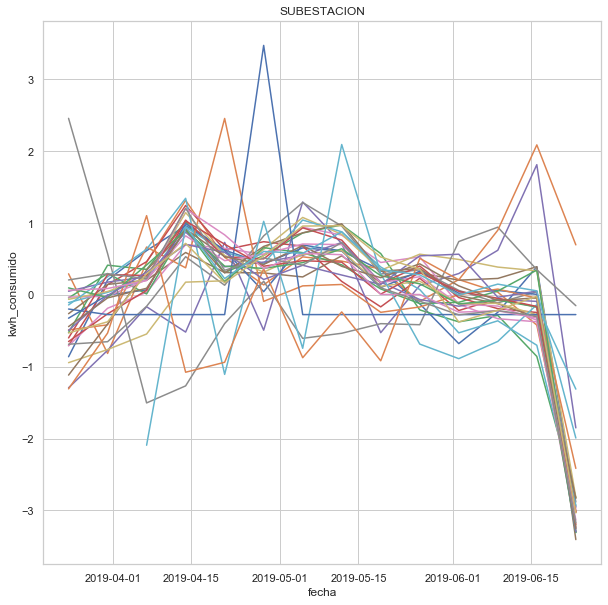

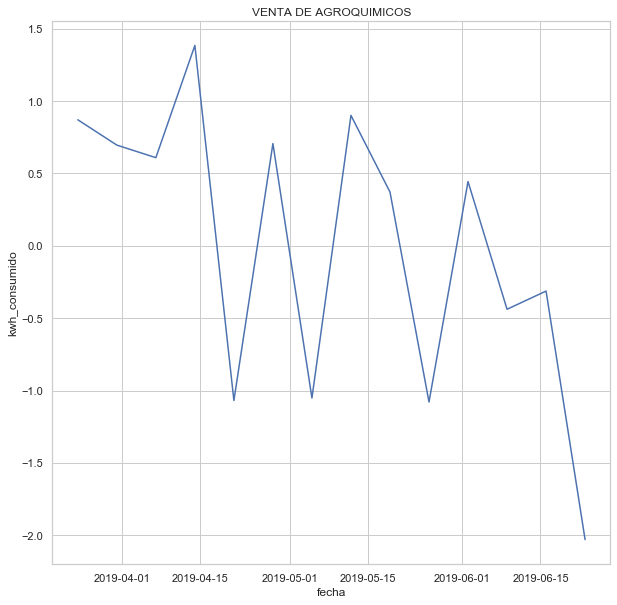

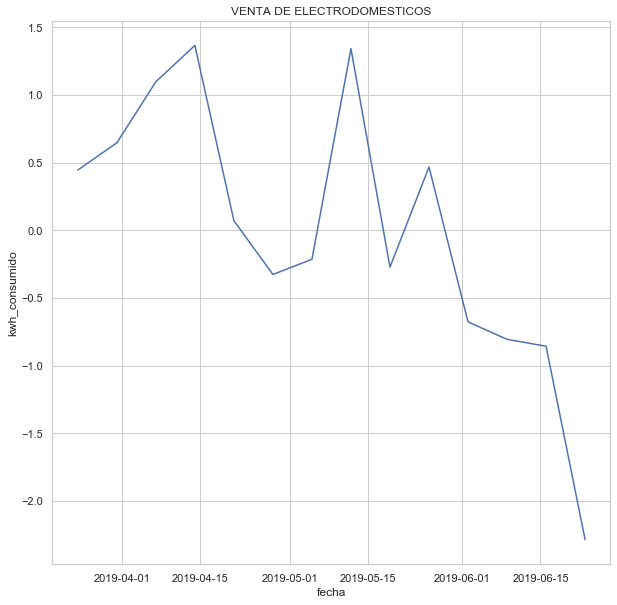

In [31]:
with PdfPages(dir_export + "TipoEmpresa.pdf") as pdf:
    tipo1 = "0"
    fig = plt.figure(figsize = (10,10))
    for name ,group in df_g:
        tipo, medidor = name
        group.set_index("fecha", inplace = True)
        group = group.resample("1W").sum()
        group["kwh_consumido"] = (group["kwh_consumido"] - group["kwh_consumido"].mean() ) / group["kwh_consumido"].std()
        if (tipo != tipo1):
            pdf.savefig(fig)
            fig = plt.figure(figsize = (10,10))
            tipo1 = tipo
        sns.lineplot(y="kwh_consumido",x = "fecha", data=group.reset_index()).set_title(tipo)
        #group["kw_consumido"].plot()
        